# Abstract

For the time being I have mainly used CTR to explore data. I will try to use other evalution metrics too later

# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from common.data_loader import DataLoader

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
dl= DataLoader()
#path = "C:/Users/Akis-/OneDrive/Masters/Web Economics/Data/"
path = "C:/temp/kaggle/webeconomics/"
filename = "validation.csv"
dl.load_file(path,filename)
df = dl.get_df_copy()
train = df

2018-04-04 16:14:23,732 : INFO : Loading C:/temp/kaggle/webeconomics/validation.csv
2018-04-04 16:14:27,703 : INFO : file  loaded


In [4]:
train.shape

(303925, 25)

In [5]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303925 entries, 0 to 303924
Data columns (total 25 columns):
click             303925 non-null int64
weekday           303925 non-null int64
hour              303925 non-null int64
bidid             303925 non-null object
userid            303925 non-null object
useragent         303925 non-null object
IP                303925 non-null object
region            303925 non-null int64
city              303925 non-null int64
adexchange        303925 non-null object
domain            303925 non-null object
url               303925 non-null object
urlid             303925 non-null object
slotid            303925 non-null object
slotwidth         303925 non-null int64
slotheight        303925 non-null int64
slotvisibility    303925 non-null object
slotformat        303925 non-null object
slotprice         303925 non-null int64
creative          303925 non-null object
bidprice          303925 non-null int64
payprice          303925 non-null int

In [7]:
print(train.head(20))
print("Pay price avergae:",train["payprice"].mean())
print("Bid price average", train["bidprice"].mean())

    click  weekday  hour                                     bidid  \
0       0        4    20  bbcb813b6166538503d8b33a5602d7d72f6019dc   
1       0        1    21  5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d   
2       0        4     8  f6ece71dae81d6b16bfb24ad6dd5611472d4c673   
3       0        5    15  b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb   
4       0        1    18  0899bf144249458ea9c89188473694bf44c7ca15   
5       0        6     1  f4c6a9a3b1db6da035c7e2a36d4f5e389095beca   
6       0        0    18  786a2940f225482dc04d455dc7a7fea436b02e03   
7       0        6    21  17ada861c6ed0616f88312ba0d3d76c0f95b4940   
8       0        0    11  6abd8ef3eb678b1afe67dc0cff0aa58413fbf29a   
9       0        5    15  442ffca310e325abc255e8ff97d9812051336acd   
10      0        0    12  a74b7ba02a4ccf3571106afb0c800b630a256d9c   
11      0        6    17  f073b222522a086278c6e52ac0e4012dd797baea   
12      0        5    13  8d3c0aa9cf1d9266f686a3ae0efa937ea0f7db3b   
13      0        0  

In [11]:
tag_list = ['10006','10024','10031','10048','10052','10057','10059','10063','10067','10074','10075','10076','10077','10079','10083','10093','10102','10684','11092','11278','11379','11423','11512','11576','11632','11680','11724','11944','13042','13403','13496','13678','13776','13800','13866','13874','14273','16593','16617','16661','16706','16751','10110','10111']


for tag in tag_list:
    t = train[train['usertag'].str.contains(tag)]
    print(tag,",Pay price,",t["payprice"].mean(),',Bid price,',t["bidprice"].mean())

10006 ,Pay price, 76.69790690227359 ,Bid price, 271.5626561089925
10024 ,Pay price, 81.24545724907063 ,Bid price, 271.3282379182156
10031 ,Pay price, 78.27046390829304 ,Bid price, 270.1912591796525
10048 ,Pay price, 82.21952444742129 ,Bid price, 270.15818263005133
10052 ,Pay price, 77.64019330504479 ,Bid price, 270.576402640264
10057 ,Pay price, 78.15771559600158 ,Bid price, 271.80926874708894
10059 ,Pay price, 78.59172116765035 ,Bid price, 272.90252033817194
10063 ,Pay price, 77.52772892419823 ,Bid price, 271.34415953159373
10067 ,Pay price, 78.69518956990859 ,Bid price, 272.25236025775513
10074 ,Pay price, 84.52269250382457 ,Bid price, 273.17202107768145
10075 ,Pay price, 79.67110129627635 ,Bid price, 271.1352292721462
10076 ,Pay price, 84.30858506207286 ,Bid price, 270.46225079865746
10077 ,Pay price, 74.88689084696998 ,Bid price, 274.3665527782773
10079 ,Pay price, 83.42286278735632 ,Bid price, 273.96524784482756
10083 ,Pay price, 77.24041991819414 ,Bid price, 271.0353747574442
100

### Null values

In [7]:
obj_cols = list(train.select_dtypes(include=['object']).columns)
nulls_list = [train[col].str.match("null").sum()*100/train.shape[0] for col in obj_cols]
nulls_df = pd.DataFrame(index = obj_cols, columns = ["Nulls_Percentage"], data = nulls_list)
nulls_df

,Nulls_Percentage
bidid,0.0
userid,0.0
useragent,0.0
IP,0.0
domain,0.0
url,0.0
slotid,0.0
slotvisibility,0.0
slotformat,0.0
creative,0.0


# Aggregated Statistics

In [8]:
def Aggregated_CTR(df, by = "weekday"):
    
    """
    Takes less time to execute than barplot.
    """
    
    feat = df[by].unique()
    res = pd.DataFrame(columns = [by, "CTR"])
    i = 0
    
    for f in feat:
        
        df_ = df.loc[df[by] == f]
        
        # Number of impressions
        impr = df_.shape[0]

        # Number of clicks
        clicks = df_["click"].sum()

        # CTR
        ctr = clicks*100/impr
        
        # Store results to dataframe
        res.loc[i] = [f, ctr]
        i+=1
        
    return res

### Weekday

In [9]:
# plt.figure(figsize = (12,6))
# sns.barplot(x = "weekday", y = "CTR", data = Aggregated_CTR(train, "weekday"), color = "lightgreen")

Text(0,0.5,'CTR')

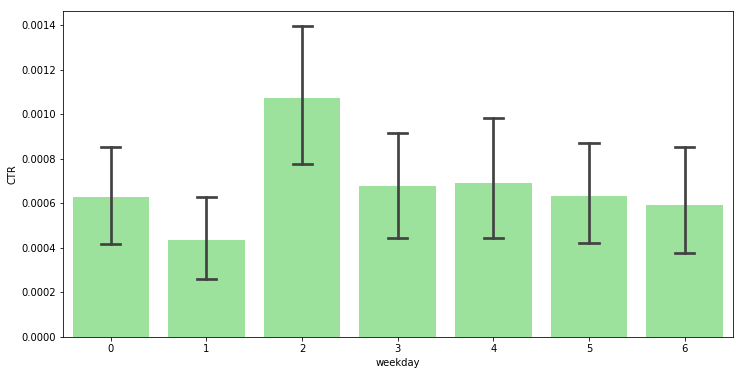

In [10]:
plt.figure(figsize = (12,6))
sns.barplot(x = "weekday", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")

### Hour

In [11]:
# plt.figure(figsize = (12,6))
# sns.barplot(x = "hour", y = "CTR", data = Aggregated_CTR(train, "hour"), color = "lightgreen")

Text(0,0.5,'CTR')

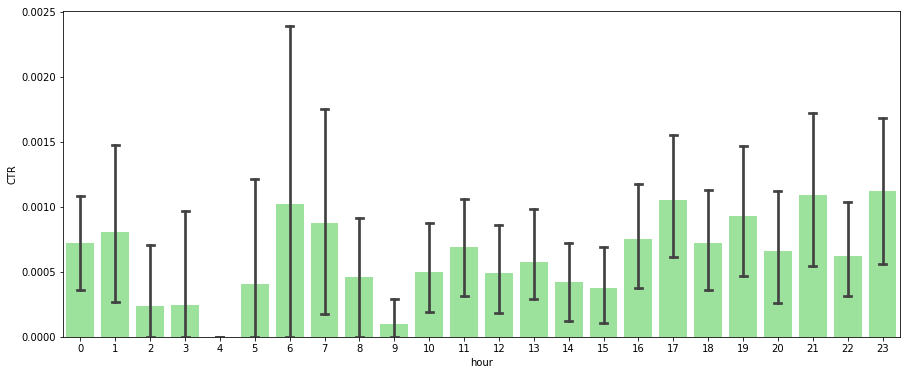

In [12]:
plt.figure(figsize = (15,6))
sns.barplot(x = "hour", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")

Question: Weekday and hour must be used as numerical or categorical features? Probably we will need to check both and decide.

Tuesday (or Wednesday) seems the most productive day of the week. Evening seems to be the most productive part of the day (17:00 - 19:00 and until 23:00). Seems kind of justified: Maybe people after having finished their work or uni, are more relaxed and maybe even search for goods to buy, so it is more probable to click an advertisement. However, a question would be is this true for every day of the week (e.g. is evening the most productive part of the day for all weekdays)? In addition to that, based on the specific part of the day, which day is the most productive? Let's create some FacetGrids to check these things...

c:\users\akis-\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


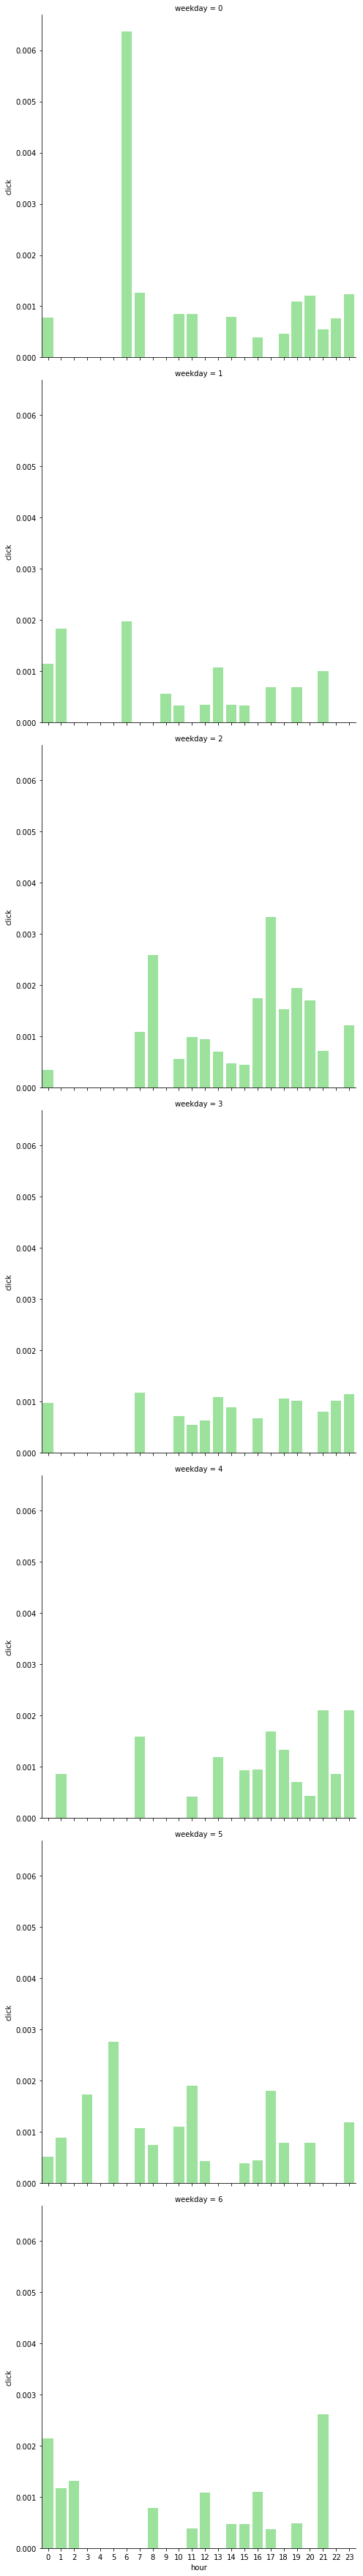

In [13]:
g = sns.FacetGrid(train, row = "weekday", size = 7)
g = g.map(sns.barplot, "hour", "click", color = "lightgreen", ci = None)

c:\users\akis-\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


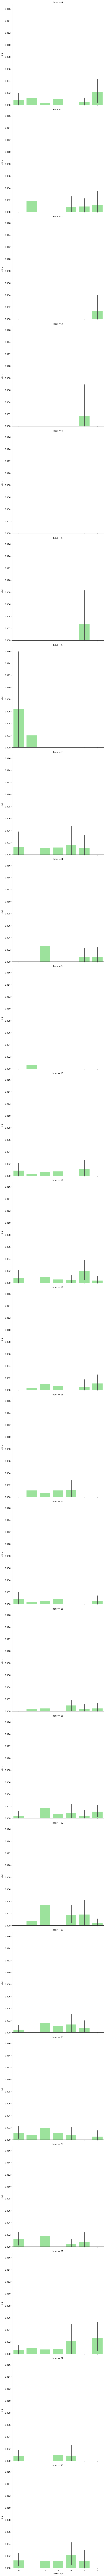

In [14]:
g = sns.FacetGrid(train, row = "hour", size = 7)
g = g.map(sns.barplot, "weekday", "click", color = "lightgreen")

As can be seen, CTR presents different behavior for different parts of the day for different weekdays. That might indicate , that it worths creating a new feature which will indicate weekday and part of the day, e.g. Monday_Morning, Monday_Afternoon, Monday_Night etc...

### Slotvisibility

In [15]:
# plt.figure(figsize = (12,6))
# sns.barplot(x = "slotvisibility", y = "CTR", data = Aggregated_CTR(train, "slotvisibility"), color = "lightgreen")

Text(0,0.5,'CTR')

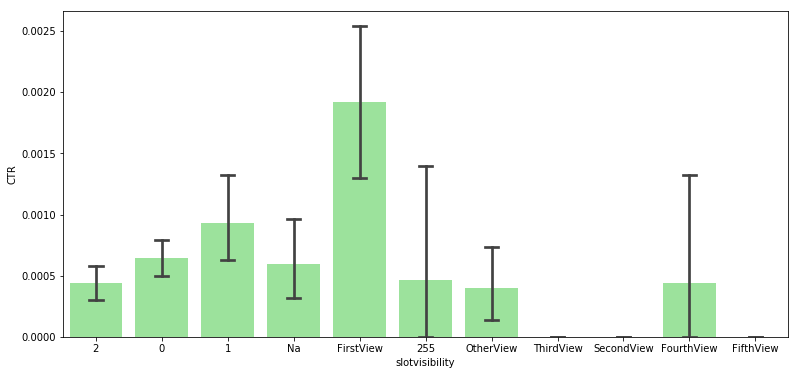

In [16]:
plt.figure(figsize = (13,6))
sns.barplot(x = "slotvisibility", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")

### Region

In [17]:
# plt.figure(figsize = (12,6))
# sns.barplot(x = "region", y = "CTR", data = Aggregated_CTR(train, "region"), color = "lightgreen")
# plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

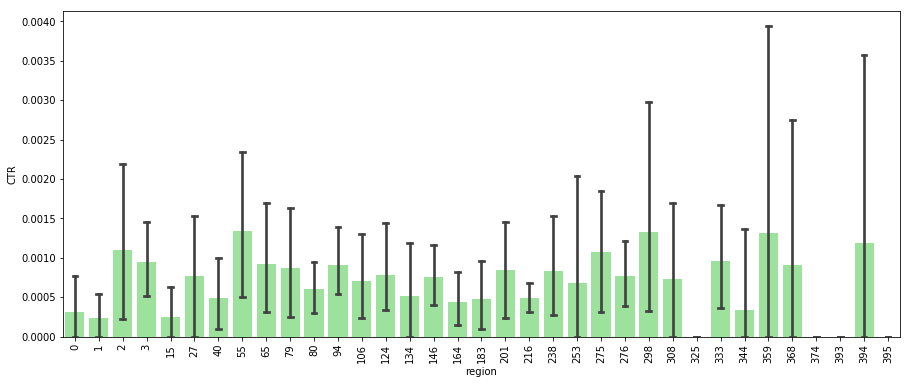

In [18]:
plt.figure(figsize = (15,6))
sns.barplot(x = "region", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")
plt.xticks(rotation = 90)

### City

In [19]:
ctr_city = Aggregated_CTR(train, "city")
ctr_city.sort_values(["CTR"], ascending = False)

,city,CTR
309,74.0,1.226994
93,370.0,0.657895
113,300.0,0.636943
173,246.0,0.561798
114,294.0,0.547945
242,72.0,0.500000
198,213.0,0.484262
276,348.0,0.478469
298,311.0,0.469484
308,40.0,0.450450


### Ad Exchange

Text(0,0.5,'CTR')

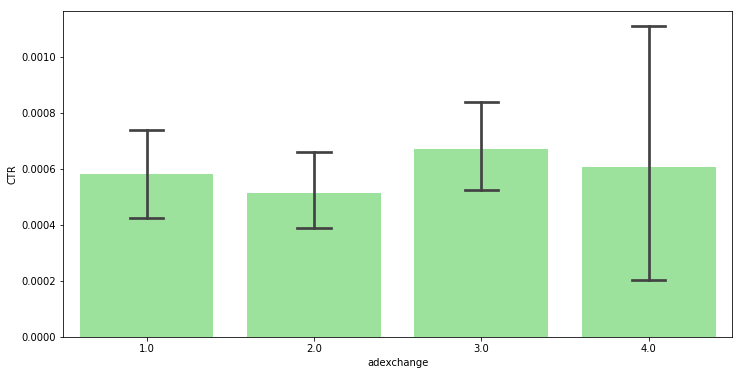

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(x = "adexchange", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")

### Domain

In [21]:
print("Feature domain has {} unique values which represents {}% of total values".format(len(train.domain.unique()),
                                                                                        len(train.domain.unique())*100/train.shape[0]))

Feature domain has 9290 unique values which represents 3.0566751665707% of total values


### Slotformat

Text(0,0.5,'CTR')

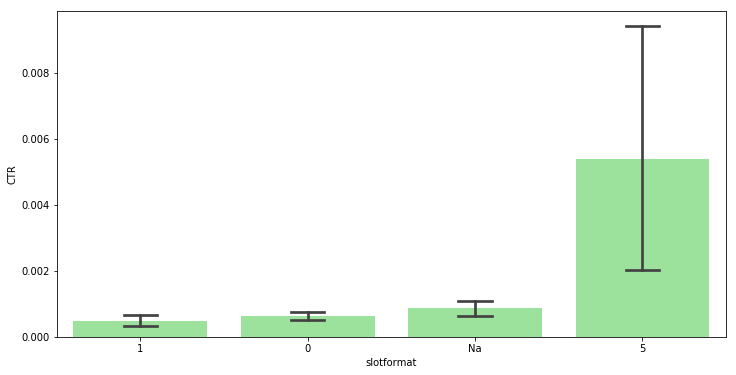

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(x = "slotformat", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")

### Slotprice

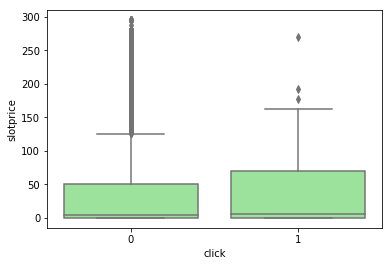

In [23]:
plt.figure(figsize = (6,4))
sns.boxplot(x = "click", y = "slotprice", data = train, color = "lightgreen")

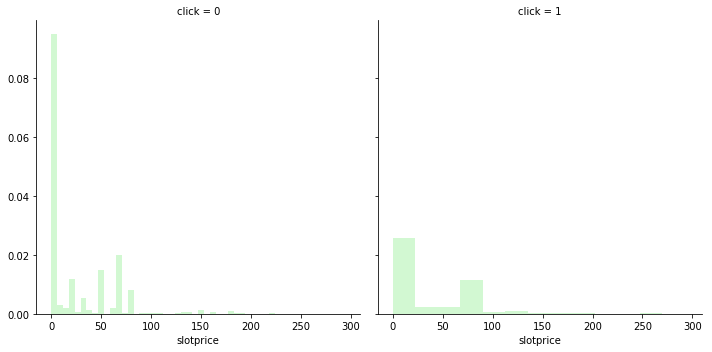

In [24]:
g1 = sns.FacetGrid(train, col = "click", size = 5)
g1 = g1.map(sns.distplot, "slotprice", norm_hist = True, kde = False, color = "lightgreen")

I am not really sure what slot price stands for.

### Advertiser

Text(0,0.5,'CTR')

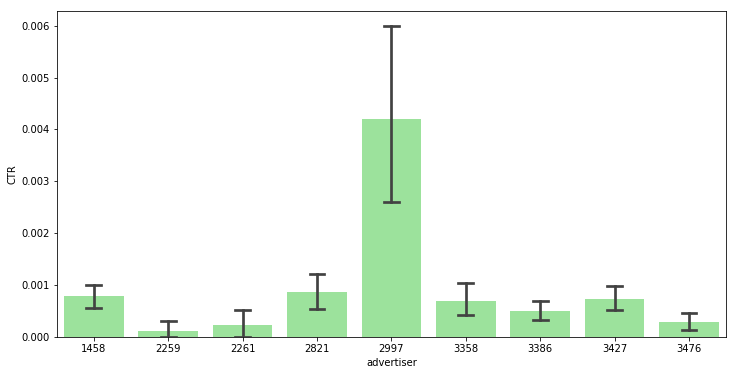

In [25]:
plt.figure(figsize = (12,6))
sns.barplot(x = "advertiser", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")

### Creative

Definition: A brief description about a service or product that the advertiser wishes to promote.

In [26]:
len(train.creative.unique())

129

Text(0.5,0,'CTR')

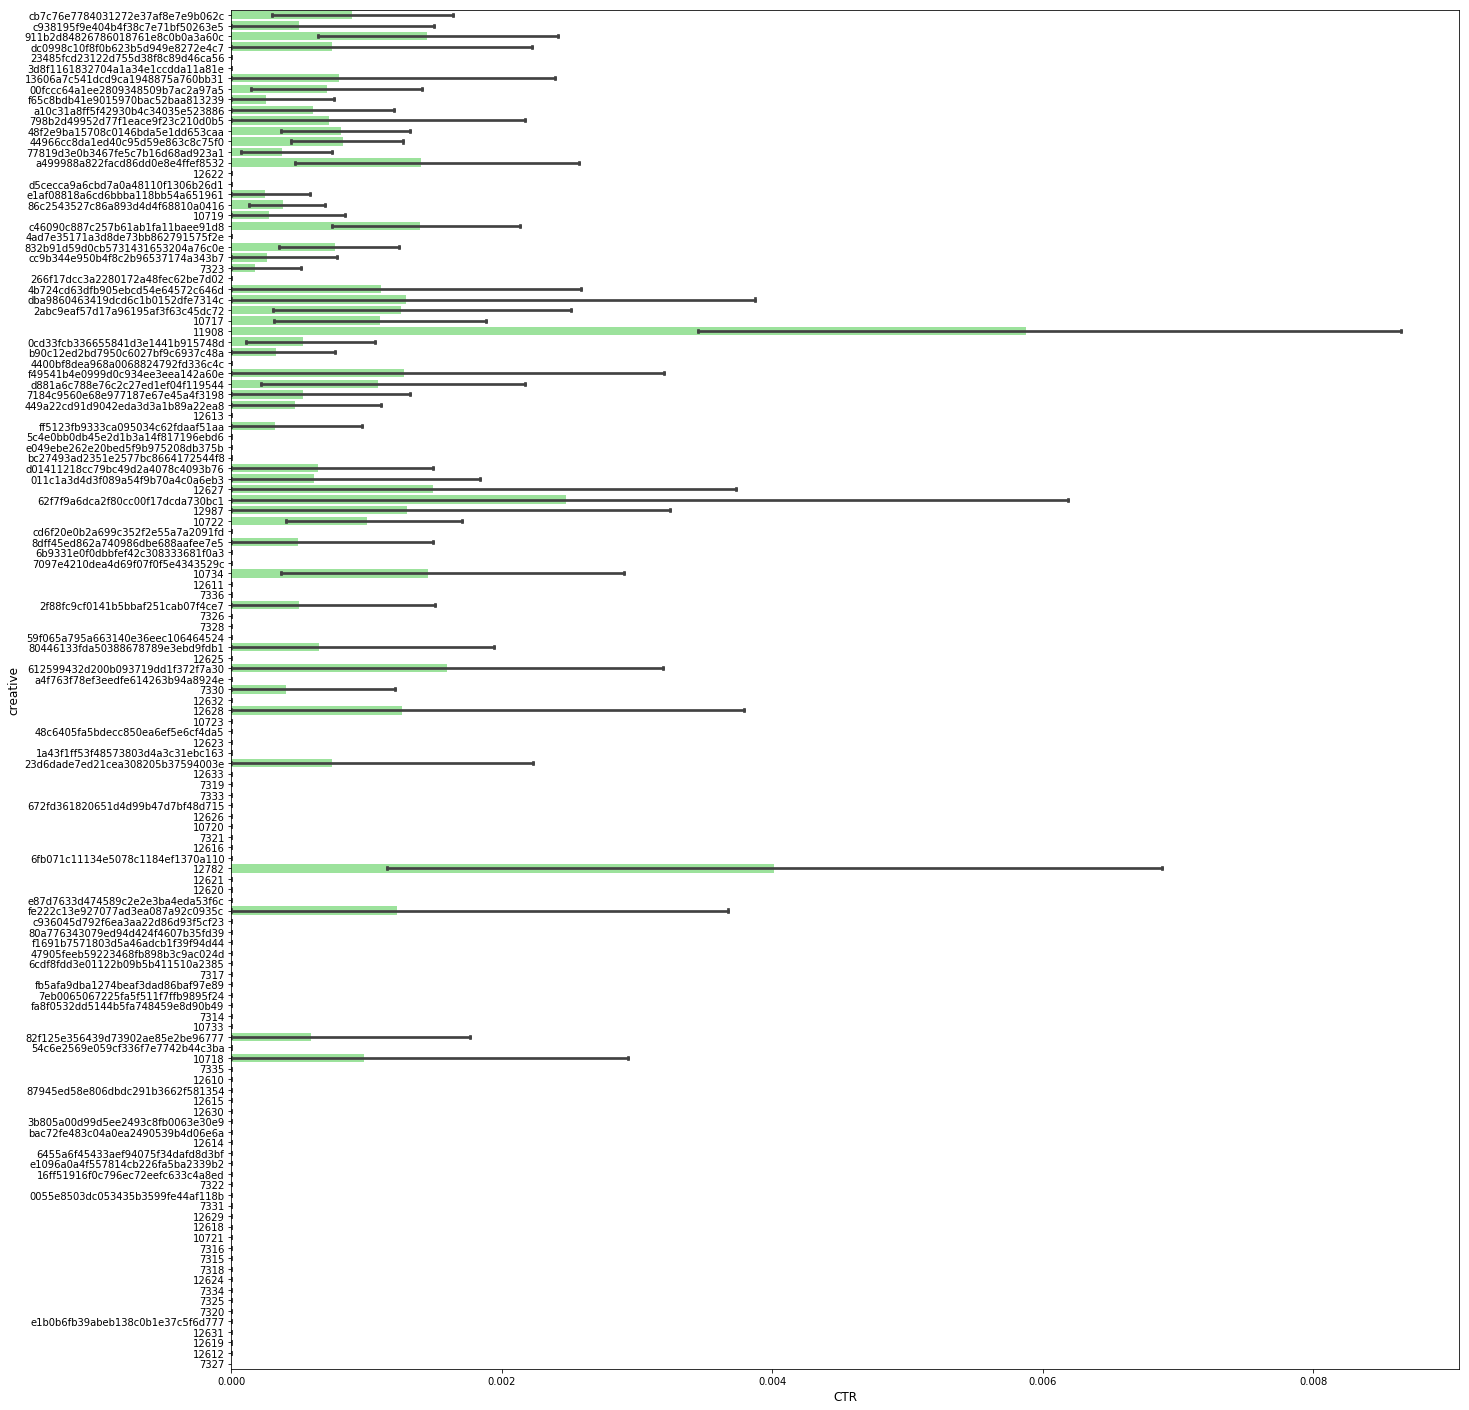

In [27]:
plt.figure(figsize = (22,25))
sns.barplot(y = "creative", x = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("creative", fontsize = 12)
plt.xlabel("CTR", fontsize = 12)

In [28]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

### Bidprice VS Payprice

In [29]:
train['BidPayDifference'] = (train["bidprice"]-train["payprice"]).copy(True)

c:\users\akis-\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Bid price average for clicks: 273.9257425742574
Bid price average for non-clicks: 273.05251824853565 

Pay price average for clicks: 105.71782178217822
Pay price average for non-clicks: 78.21572617154446 

Bid-Pay-Difference average for clicks: 168.20792079207922
Bid-Pay-Difference average for non-clicks: 194.8367920769912 



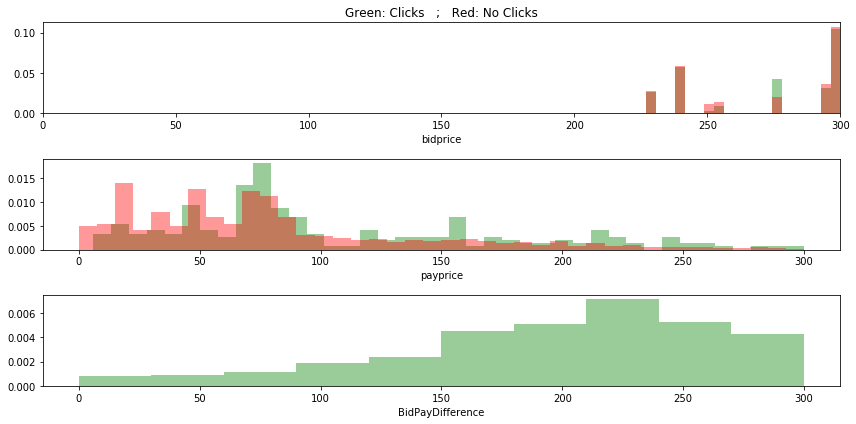

In [35]:
plt.figure(figsize = (12,6))

ax = plt.subplot(3,1,1)
sns.distplot(train.loc[train["click"] == 1, "bidprice"], bins = 20, kde = False, norm_hist = True, color = "green")
ax = plt.subplot(3,1,1)
sns.distplot(train.loc[train["click"] == 0, "bidprice"], bins = 20, kde = False, norm_hist = True, color = "red")
ax.set_xlim([0,300])
ax.set_title("Green: Clicks   ;   Red: No Clicks")

ax = plt.subplot(3,1,2)
sns.distplot(train.loc[train["click"] == 1, "payprice"], bins = 40, kde = False, norm_hist = True, color = "green")
ax = plt.subplot(3,1,2)
sns.distplot(train.loc[train["click"] == 0, "payprice"], bins = 40, kde = False, norm_hist = True, color = "red")

ax = plt.subplot(3,1,3)
sns.distplot(train["BidPayDifference"], bins = 10, kde = False, norm_hist = True, color = "green")
#ax = plt.subplot(3,1,3)
#sns.distplot(train.loc[train["click"] == 1, "BidPayDifference"], bins = 40, kde = False, norm_hist = True, color = "green")
#ax = plt.subplot(3,1,3)
#sns.distplot(train.loc[train["click"] == 0, "BidPayDifference"], bins = 40, kde = False, norm_hist = True, color = "red")

plt.tight_layout()

print("Bid price average for clicks:",train.loc[train["click"] == 1, "bidprice"].mean())
print("Bid price average for non-clicks:",train.loc[train["click"] == 0, "bidprice"].mean(),"\n")

print("Pay price average for clicks:",train.loc[train["click"] == 1, "payprice"].mean())
print("Pay price average for non-clicks:",train.loc[train["click"] == 0, "payprice"].mean(),"\n")
print("Pay price average:",train["payprice"].mean(),"\n")

print("Bid-Pay-Difference average for clicks:",train.loc[train["click"] == 1, "BidPayDifference"].mean())
print("Bid-Pay-Difference average for non-clicks:",train.loc[train["click"] == 0, "BidPayDifference"].mean(),"\n")

## Feature Engineering

In [31]:
def UsertagCategories(df):
    
    # Find unique usertags
    usertags_list = [train["usertag"][i].split(",") for i in range(train.shape[0])]
    ## itertools.chain.from_iterable joins a list of lists into a single list
    list_combined = np.unique(list(itertools.chain.from_iterable(usertags_list)))
    usertags = [i for i in list_combined if i != "null"]
    
    for tag in usertags:
        df[tag] = df["usertag"].map(lambda x: 1 if tag in x.split(",") else 0)
        
    return df


def FeatureEngineering(df):
        
        # Operating system
        df["os"] = df["useragent"].map(lambda x: x.split("_")[0])
        
        # Browser
        df["browser"] = df["useragent"].map(lambda x: x.split("_")[0])
        
        # Slotarea
        df["slotarea"] = df["slotwidth"]*df["slotheight"]   ####.astype("category")
        
        # Part of the day
        df["part_of_the_day"] = ""
        
        df.loc[(df["weekday"] == 0) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Sunday_Night"
        df.loc[(df["weekday"] == 0) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Sunday_Morning"
        df.loc[(df["weekday"] == 0) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Sunday_Evening"
        
        df.loc[(df["weekday"] == 1) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Monday_Night"
        df.loc[(df["weekday"] == 1) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Monday_Morning"
        df.loc[(df["weekday"] == 1) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Monday_Evening"

        
        df.loc[(df["weekday"] == 2) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Tuesday_Night"
        df.loc[(df["weekday"] == 2) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Tuesday_Morning"
        df.loc[(df["weekday"] == 2) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Tuesday_Evening"

        df.loc[(df["weekday"] == 3) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Wednesday_Night"
        df.loc[(df["weekday"] == 3) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Wednesday_Morning"
        df.loc[(df["weekday"] == 3) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Wednesday_Evening"

        df.loc[(df["weekday"] == 4) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Tuesday_Night"
        df.loc[(df["weekday"] == 4) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Tuesday_Morning"
        df.loc[(df["weekday"] == 4) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Tuesday_Evening"

        df.loc[(df["weekday"] == 5) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Friday_Night"
        df.loc[(df["weekday"] == 5) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Friday_Morning"
        df.loc[(df["weekday"] == 5) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Friday_Evening"

        
        df.loc[(df["weekday"] == 6) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Saturday_Night"
        df.loc[(df["weekday"] == 6) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Saturday_Morning"
        df.loc[(df["weekday"] == 6) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Saturday_Evening"
        
        # Slotprice binning
        df["slotprice_cat"] = 0
        
        df.loc[ df["slotprice"] <= 10, "slotprice_cat"] = 0
        df.loc[ (df["slotprice"] > 10) & (df["slotprice"] <= 50), "slotprice_cat"] = 1
        df.loc[ (df["slotprice"] > 50) & (df["slotprice"] <= 100), "slotprice_cat"] = 2
        df.loc[ df["slotprice"] > 100, "slotprice_cat"] = 3

        
        # Usertags
        df = UsertagCategories(df)
        
  
        return df

In [32]:
train = FeatureEngineering(train)

AttributeError: 'float' object has no attribute 'split'

In [ ]:
train.columns

In [ ]:
train.head()

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = "os", y = "click", data = train, color = "lightgreen", capsize = 0.2)

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = "browser", y = "click", data = train, color = "lightgreen", capsize = 0.2)

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = "slotarea", y = "CTR", data = Aggregated_CTR(train, "slotarea"), color = "lightgreen")
plt.xticks(rotation = 90)

Slotarea must be used as numerical or categorical variable??

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x = "part_of_the_day", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.xticks(rotation = 90)

### Usertag

In [ ]:
train.columns[29:]

In [ ]:
tags = pd.DataFrame(columns = ["Usertag", "CTR"])
i = 0

for col in train.columns[29:]:
    
    impr = train[col].sum()
    clicks = train.loc[ (train[col] == 1) & (train["click"] == 1) ].shape[0]
    ctr = clicks*100/impr
    
    tags.loc[i] = [col, ctr]
    i+=1

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x = "Usertag", y = "CTR", data = tags, color = "lightgreen")
plt.xticks(rotation = 90)

### Slotprice_cat

In [ ]:
train["slotprice_cat"] = 0
        
train.loc[ train["slotprice"] <= 10, "slotprice_cat"] = 0
train.loc[ (train["slotprice"] > 10) & (train["slotprice"] <= 50), "slotprice_cat"] = 1
train.loc[ (train["slotprice"] > 50) & (train["slotprice"] <= 100), "slotprice_cat"] = 2
train.loc[ train["slotprice"] > 100, "slotprice_cat"] = 3

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = "slotprice_cat", y = "click", data = train, color = "lightgreen", capsize = 0.2)

In [ ]:
train.columns

# Statistics per Advertiser

In [ ]:
train["advertiser"].value_counts()

In [ ]:
advert = train["advertiser"].unique()
advert

## Summary Statistics

In [ ]:
df = pd.DataFrame(columns = ["Advertiser", "Impressions", "Clicks", "Bids", "Cost", "CTR", "eCPC", "CPM"])

In [ ]:
cny_currency = 0.15765
i=0

for adv in advert:
    
    # Impressions
    imp = train.loc[ train["advertiser"] == adv ].shape[0]
    
    # Clicks
    clicks = train.loc[ train["advertiser"] == adv ]["click"].sum()
    
    # Bids
    bids = train.loc[ train["advertiser"] == adv ]["bidprice"].sum()
    
    # Paid
    cost = train.loc[ train["advertiser"] == adv ]["payprice"].sum()
    
    # CTR
    ctr = clicks*100/imp
    
    # eCPC
    e_cpc = cost/clicks
    
    # CPM
    cpm = cost*1000/imp
    
    # Store results
    df.loc[i] = [adv, imp, clicks, bids, cost, ctr, e_cpc, cpm]
    i+=1

In [ ]:
df

In [ ]:
plt.figure(figsize = (14,14))

plt.subplot(3,1,1)
sns.barplot(x = "Advertiser", y = "CTR", data = df, color = "lightgreen")
plt.title("CTR per advertiser", fontsize = 14)

plt.subplot(3,1,2)
sns.barplot(x = "Advertiser", y = "eCPC", data = df, color = "lightgreen")
plt.title("eCPC per advertiser", fontsize = 14)

plt.subplot(3,1,3)
sns.barplot(x = "Advertiser", y = "CPM", data = df, color = "lightgreen")
plt.title("CPM per advertiser", fontsize = 14)

plt.tight_layout()

In [ ]:
def CTR(df, advert = [3427], by = "weekday"):
    
    # Advertisers
    #advert = df["advertiser"].unique()
    
    # Unique features
    feat = df[by].unique()
    
    # Create dataframe
    res = pd.DataFrame(columns = ["Advertiser", by, "CTR"])
    i = 0
    
    for adv in advert:
        
        for f in feat:
            
            df_ = df.loc[ (df["advertiser"] == adv) & (df[by] == f)]
        
            # Number of impressions
            impr = df_.shape[0]
    
            # Number of clicks
            clicks = df_["click"].sum()
    
            # CTR
            try:
                ctr = clicks*100/impr
            except ZeroDivisionError:
                ctr = 0
            
            res.loc[i] = [adv, f, ctr]
            i+=1
        
    
    return res

### Weekday

In [ ]:
plt.figure(figsize = (14,6))
sns.pointplot(x = "weekday", y = "CTR", hue = "Advertiser", 
              data = CTR(train, advert[:3], by = "weekday"), 
              size = 6, 
              palette="BuGn")
plt.legend(loc = "best")

### Hour

In [ ]:
plt.figure(figsize = (14,6))
sns.pointplot(x = "hour", y = "CTR", hue = "Advertiser", 
              data = CTR(train, advert[:3], by = "hour"), 
              size = 6,
              palette="BuGn")
plt.xticks(rotation = 90)

### OS

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = "os", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "os"),
            palette="BuGn")

### Browser

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = "browser", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "browser"), 
            palette="BuGn")

### Region

In [ ]:
plt.figure(figsize = (18,6))
sns.barplot(x = "region", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "region"),
            palette="BuGn")
plt.xticks(rotation = 90)

### Slot Area

In [ ]:
plt.figure(figsize = (18,6))
sns.barplot(x = "slotarea", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "slotarea"),
            palette="BuGn")
plt.xticks(rotation = 90)

### Slot Visibility

In [ ]:
plt.figure(figsize = (18,6))
sns.barplot(x = "slotvisibility", y="CTR", hue = "Advertiser",
            data = CTR(train, advert[:4], by = "slotvisibility"),
            palette="BuGn")
plt.xticks(rotation = 90)

### Ad-exchange

In [ ]:
plt.figure(figsize = (18,6))
sns.barplot(x = "adexchange", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "adexchange"),
            palette="BuGn")
plt.xticks(rotation = 90)